Epoch 1/5
157/157 [==============================] - 102s 641ms/step - loss: 0.6674 - accuracy: 0.5717 - val_loss: 0.6252 - val_accuracy: 0.6312
Epoch 2/5
157/157 [==============================] - 96s 610ms/step - loss: 0.4704 - accuracy: 0.7724 - val_loss: 0.4830 - val_accuracy: 0.7702
Epoch 3/5
157/157 [==============================] - 89s 567ms/step - loss: 0.2844 - accuracy: 0.8826 - val_loss: 0.5369 - val_accuracy: 0.7316
Epoch 4/5
157/157 [==============================] - 86s 548ms/step - loss: 0.4508 - accuracy: 0.7886 - val_loss: 0.6426 - val_accuracy: 0.6634
Epoch 5/5
196/196 [==============================] - 8s 38ms/step - loss: 0.6213 - accuracy: 0.6380
Epoch 1/5
157/157 [==============================] - 29s 165ms/step - loss: 0.5882 - accuracy: 0.6745 - val_loss: 0.4352 - val_accuracy: 0.8004
Epoch 2/5
157/157 [==============================] - 18s 113ms/step - loss: 0.3314 - accuracy: 0.8605 - val_loss: 0.3533 - val_accuracy: 0.8450
Epoch 3/5
157/157 [================

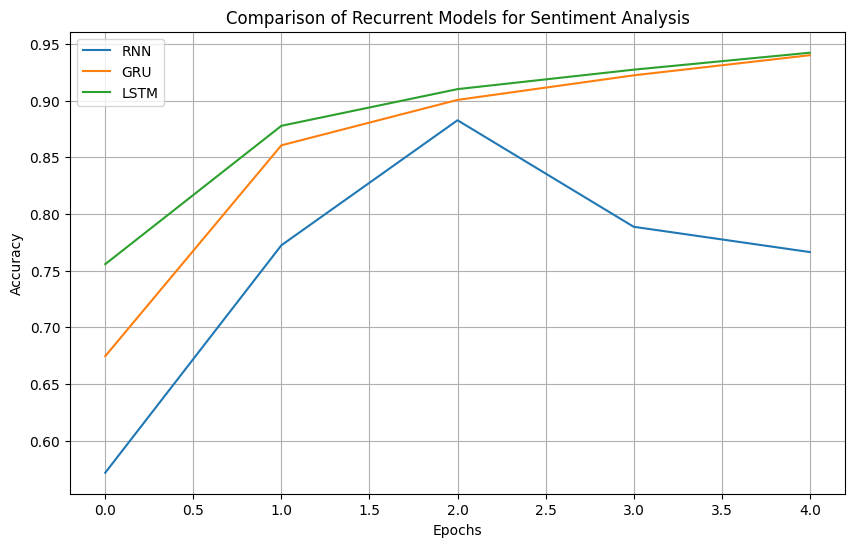

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, GRU, LSTM, Dense
from tensorflow.keras.preprocessing import sequence


max_words = 5000

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_words)

max_length = 500
x_train = sequence.pad_sequences(x_train, maxlen=max_length)
x_test = sequence.pad_sequences(x_test, maxlen=max_length)

accuracies = []

model_names = ["RNN", "GRU", "LSTM"]

models = [
    Sequential([
        Embedding(max_words, 100, input_length=max_length),
        SimpleRNN(128),
        Dense(1, activation='sigmoid')
    ]),
    Sequential([
        Embedding(max_words, 100, input_length=max_length),
        GRU(128),
        Dense(1, activation='sigmoid')
    ]),
    Sequential([
        Embedding(max_words, 100, input_length=max_length),
        LSTM(128),
        Dense(1, activation='sigmoid')
    ])
]


batch_size = 128
epochs = 5


histories = []

for model in models:
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)
    histories.append(history)
    _, accuracy = model.evaluate(x_test, y_test, batch_size=batch_size)
    accuracies.append(accuracy)


plt.figure(figsize=(10, 6))
for i, history in enumerate(histories):
    plt.plot(history.history['accuracy'], label=model_names[i])

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Comparison of Recurrent Models for Sentiment Analysis')
plt.legend()
plt.grid(True)
plt.show()